## **Actividad. Regresión con Árboles de Decisión**


Diabetes dataset
----------------

Diez variables: edad, sexo, índice de masa corporal, presión media de la sangre más seis mediciones de suero sanguíneo para cada uno de n =
442 pacientes diabéticos, así como una
medida cuantitativa de la *progresión de la enfermedad* un año después del inicio. Esta medida va a ser la que vamos a tratar de predecir.

**Características:**
* Age
* Sex
* Body mass index (BMI)
* Average blood pressure (BP)
* S1
* S2
* S3
* S4
* S5
* S6

Fuente URL:

https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Para más información:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeRegressor

### **Lectura del dataset**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving diabetes_dataset.csv to diabetes_dataset.csv


In [4]:
path = "/content/diabetes_dataset.csv"
df_ini = pd.read_csv(path, sep=";")
print (df_ini.shape)
df_ini.head()

(442, 11)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### **División en Train/Test**

In [5]:
X = df_ini.iloc[:,0:-1]
y = df_ini.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


### **Bucle para la selección de "max_depth"**

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [9]:
df.set_index("max_depth", inplace=True)

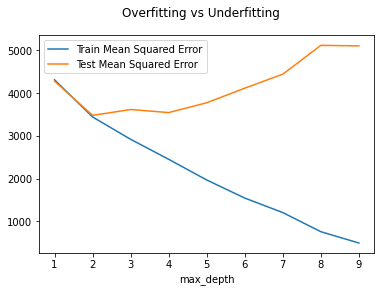

In [10]:
df["mse_train"].plot(label="Train Mean Squared Error")
df["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

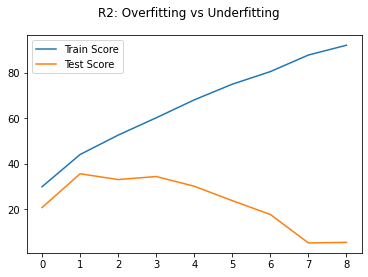

In [15]:
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

### **Entrenamiento y evaluación del modelo**

In [19]:
from sklearn.tree import plot_tree
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

0.5253186588715137


### **Cálculo de la Importancia de las Variables**

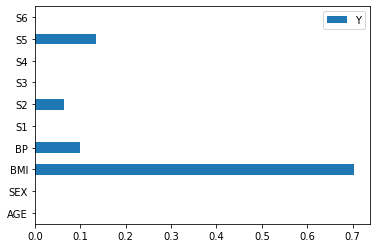

In [20]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

### **Generación del Grafo para su análisis**

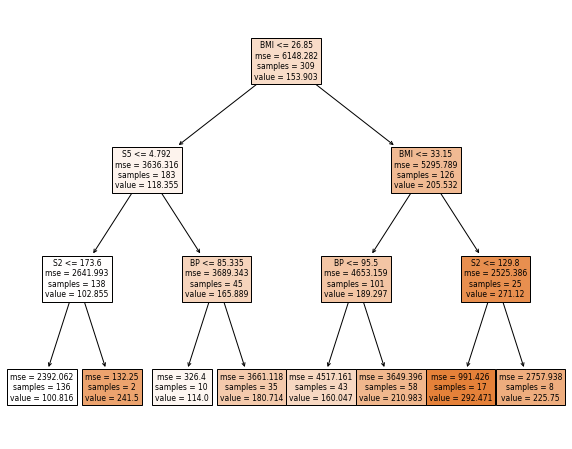

In [21]:
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Y"])
plt.show()

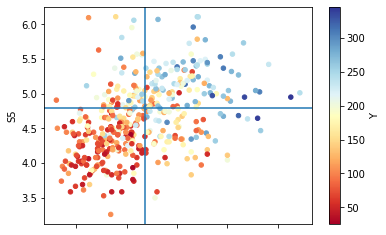

In [22]:
df_ini.plot.scatter(x="BMI", y="S5", c="Y", cmap=plt.cm.RdYlBu)
plt.axvline(26.85)
plt.axhline(4.792)

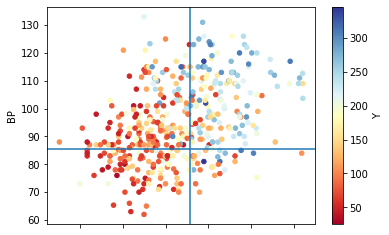

In [23]:
df_ini.plot.scatter(x="S5", y="BP", c="Y", cmap=plt.cm.RdYlBu)
plt.axvline(4.792)
plt.axhline(85.335)